# **TAREA 7.Generación de Periodogramas**<br>
*** 
- Alumnos:
<br> Ramos Corona, Melissa Guadalupe.
<br> Santa Fe García, Braulio Leonardo.

***
<br><br>
#### 1.- Estableciendo parámetros, muestréando  y agregándole ruido a la señal. <br>





In [1]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors
%matplotlib inline

##### Estableciendo parámetros para nuestra señal
###### Frecuencias
frecuencia1= 5 $[hz]$<br>
frecuencia2= 6 $[hz]$<br>
frecuencia3= 30 $[hz]$<br>
frecuencia4= 40 $[hz]$<br><br>
###### Amplitud
amplitud1= 2.5 <br>
amplitud2= 5.0 <br>
amplitud3= -10 <br>
amplitud4= 15 <br><br>

###### muestras
 m=100 <br>

Text(0.5, 1.0, 'Función muestreada')

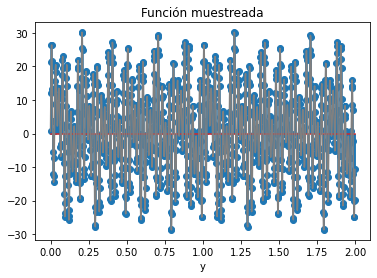

In [2]:
#Definiendo frecuencias y amplitudes
f1=5.
f2=6.
f3=30.
f4=40.

a1=2.5
a2=5.0
a3=10.
a4=15.

m=1000

#Para sacar la frecuencia de muestreo es necesario lo siguiente
# Obtener la frecuencia que hay en la señal

Fsen=f4*2.*np.pi/2*np.pi
#Fsen=40
#Obteniendo la frecuencia de muestreo
fm=2*Fsen
Ts=1/fm

#por lo tanto
fd=Fsen/fm
#periodo inverso a la frecuencia de la señal digital
Td=1/fd

t=np.zeros(m)
#t=np.linspace(0,int(Td),1000)

#Generando código para sustitución de linspace
for i in range (1000):
    t[i]=0+i*Td/1000
    #print(t)
 
#Funcion para generar el ruido que vaya de 0 a 1      

def ruido(lin): 
    aux=np.random.rand(1)*10
    if aux<lin: 
        return aux
    else:
        aux2=ruido(lin)
        return aux2
#señal con todos los parámetros
x=a1*np.sin(2.*np.pi*f1*t)+a2*np.sin(f2*2.*np.pi*t)+a3*np.sin(f3*2.*np.pi*t)+a4*np.sin(f4*2.*np.pi*t)+ruido(1)
       


plt.stem(t,x)
plt.plot(t,x,c='grey')
plt.xlabel("y")
#para graficar de forma discreta
plt.title('Función muestreada')


###2.-Generando la señal en decibles.

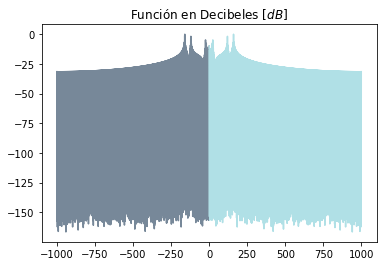

In [3]:
#función en decibeles
y=10*np.log10(np.abs(np.fft.fft(x,n=2000))/np.max(np.abs(np.fft.fft(x,n=2000))))

f=np.linspace(-1000,0,1000)
#f=np.zeros(1000)
#for i in range (1000):
    #f[i]=0+i*-1000/1000
    
mit1=y[:len(y)//2]
mit2=list(reversed(mit1))
plt.title('Función en Decibeles $[dB]$')

plt.plot(f,mit2,'lightslategray')
plt.plot(mit1,'powderblue')
#plt.plot(f,y)

### 3.- Estableciendo la ventana de hanning y su relación con la señal.

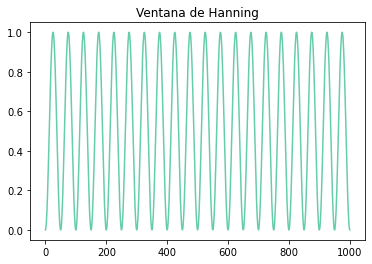

In [4]:
#señal
x=a1*np.sin(2.*np.pi*f1*t)+a2*np.sin(f2*2.*np.pi*t)+a3*np.sin(f3*2.*np.pi*t)+a4*np.sin(f4*2.*np.pi*t)
#Definiendo la ventana de HANNING.
N=50.
t=np.linspace(0,-1000,1000)
#hann = lambda t: (np.sin(np.pi*t/N))**2
hann=(np.sin(np.pi*t/N))**2
#plt.plot(t,hann(t),'g')

#Multiplicando la Señal por la ventana de Hanning
f=hann*x
plt.title('Ventana de Hanning')
plt.plot(hann,'mediumaquamarine')

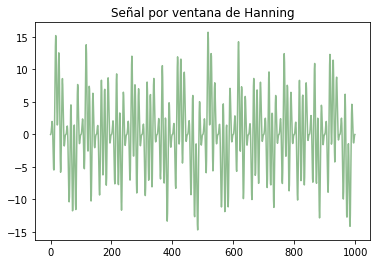

In [5]:
plt.title('Señal por ventana de Hanning')
plt.plot(f,'darkseagreen')

###4.- Función para la transformada discreta de Fourier aplicada a la señal.

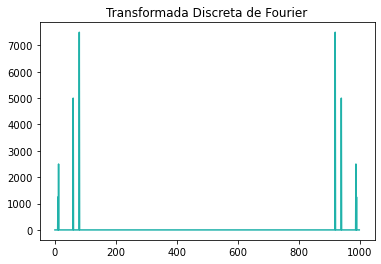

In [6]:
def DFT(x):
    x = np.array(x,dtype=float)
    #x=a1*np.sin(2.*np.pi*f1*t)+a2*np.sin(f2*2.*np.pi*t)+a3*np.sin(f3*2.*np.pi*t)+a4*np.sin(f4*2.*np.pi*t)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
plt.title('Transformada Discreta de Fourier')
plt.plot((np.abs(DFT(x))),'lightseagreen',label='DFT parte absoluta ')


### 5.- Periodograma $(F^2)$. <br>
#### 5.1.- Periodograma Normal $PN$ & Periodograma Modificado $PM$.

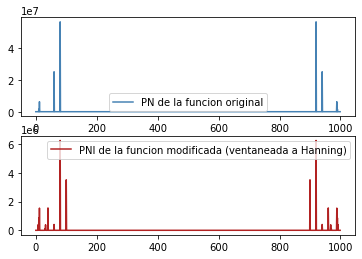

In [7]:
#PERIODOGRAMA,ESPECTRO DE POTENCIA, PN
#tranformada al cuadraro de F
P=np.abs(DFT(x))**2
F=np.abs(DFT(f))**2
plt.title('Periodograma Normal (PN)')
plt.subplot(2,1,1)
plt.plot(P,'steelblue',label='PN de la funcion original')
plt.legend()
plt.subplot(2,1,2)
plt.plot(F,'firebrick',label='PNl de la funcion modificada (ventaneada a Hanning)')
plt.legend()

#### 5.2.- Periodogramas con acercamiento.

(885.0, 1000.0)

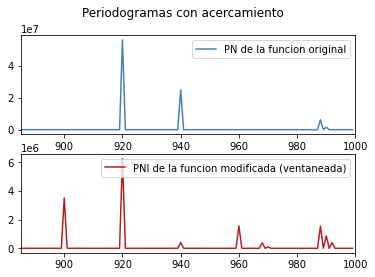

In [8]:
plt.title('Periodogramas mo Normal (PN)')
plt.suptitle('Periodogramas con acercamiento')
plt.subplot(2,1,1)
plt.plot(P,'steelblue',label='PN de la funcion original')
plt.legend()
plt.xlim(885,1000)
plt.subplot(2,1,2)
plt.plot(F,'firebrick',label='PNl de la funcion modificada (ventaneada)')
plt.legend()
plt.xlim(885,1000)

### 6.- Periodograma de Bartlett.<br>
#### 6.1.- Con tres segmentos $n=3$ .

Text(0.5, 1.0, 'Periodogramas con Bartlett en 3 divisiones')

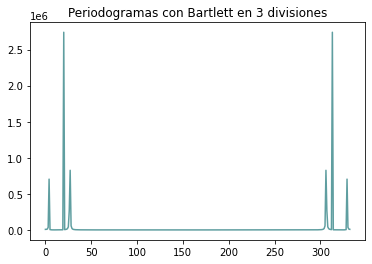

In [9]:
#Periodograma de BARTLETT

#CON 3 SEGMENTOS
segmentos=np.array_split(x,3)
s1=segmentos[0]
s2=segmentos[1]
s3=segmentos[2]

#Eliminamos un valos del segmento 1 para poder hacer el promedio
s1=np.delete(s1,-1)

S1=DFT(s1)**2
S2=DFT(s2)**2
S3=DFT(s3)**2

Prom=(S1+S2+S3)/3
plt.plot(np.abs(Prom),'cadetblue')
plt.title('Periodogramas con Bartlett en 3 divisiones')


#### 6.1.- Con seis segmentos $n=6$ .

Text(0.5, 1.0, 'Periodogramas con Bartlett en 6 divisiones')

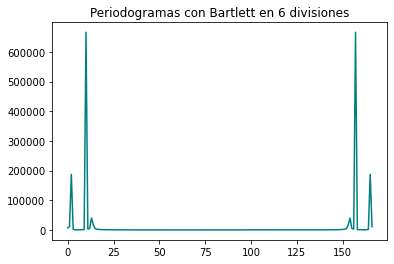

In [10]:
#CON 6 SEGMENTOS
segmentos1=np.array_split(x,6)
s11=segmentos1[0]
s22=segmentos1[1]
s33=segmentos1[2]
s4=segmentos1[3]
s5=segmentos1[4]
s6=segmentos1[5]

#Agregamos valores a los segmentos 5 y 6 para poder hacer el promedio
s5=np.append(s5,1)
s6=np.append(s6,1)

S11=DFT(s11)**2
S22=DFT(s22)**2
S33=DFT(s33)**2
S4=DFT(s4)**2
S5=DFT(s5)**2
S6=DFT(s6)**2


Prom1=(S11+S22+S33+S4+S5+S6)/6
plt.plot(np.abs(Prom1),'teal')
plt.title('Periodogramas con Bartlett en 6 divisiones')

#### 6.1.- Con ocho segmentos $n=8$ .

Text(0.5, 1.0, 'Periodogramas con Bartlett con 8 divisiones')

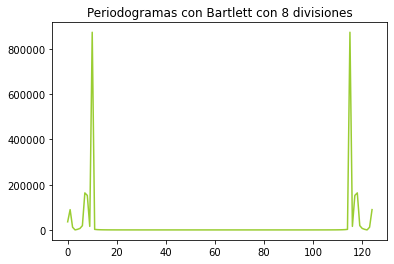

In [11]:
#CON 8 SEGMENTOS
segmentos2=np.array_split(x,8)
p1=segmentos2[0]
p2=segmentos2[1]
p3=segmentos2[2]
p4=segmentos2[3]
p5=segmentos2[4]
p6=segmentos2[5]
p7=segmentos2[6]
p8=segmentos2[7]



P1=DFT(p1)**2
P2=DFT(p2)**2
P3=DFT(p3)**2
P4=DFT(p4)**2
P5=DFT(p5)**2
P6=DFT(p6)**2
P7=DFT(p7)**2
P8=DFT(p8)**2




Prom2=(P1+P2+P3+P4+P5+P6+P7+P8)/8
plt.plot(np.abs(Prom2),'yellowgreen')
plt.title('Periodogramas con Bartlett con 8 divisiones')